# Usage examples

## Imports

In [2]:
import numpy as np
import sympy as sp
import robobox as rbb

### axisangle_rotation.py

In [3]:
# Unit vector
r = (np.sqrt(2)/2)*np.array([0, -1, 1])

# Rotation angle
theta = np.pi/6

# Rotation matrix
R = rbb.axisangle_rotation(r=r, theta=theta)
print(R)

[[ 0.8660254  -0.35355339  0.35355339]
 [ 0.35355339  0.9330127  -0.0669873 ]
 [ 0.35355339 -0.0669873   0.9330127 ]]


### compute_jacobian.py

Displays the Jacobian matrix. Example with the 2R planar robot arm:

In [4]:
theta1, theta2, l1, l2 = sp.symbols('theta1 theta2 l1 l2')

# 2R Forward Kinematics
x = l1 * sp.cos(theta1) + l2 * sp.cos(theta1 + theta2)
y = l1 * sp.sin(theta1) + l2 * sp.sin(theta1 + theta2)

functions = [x, y]
variables = [theta1, theta2]

J = rbb.compute_jacobian(functions, variables)

sp.pprint(J)

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎦


### cubic_poly_dnorm_coeffs.py

In [5]:
rbb.cubic_poly_dnorm_coeffs(0, 10, 0, 0, 1, verbose=1)

==== Equations ====
Eq(d, 0) Eq(a + b + c, 1) Eq(c, 0.0) Eq(3*a + 2*b + c, 0.0)
==== Symbolic solutions [a, b, c, d] ====
[-2.00000000000000, 3.00000000000000, 0.0, 0.0]
==== Normalized trajectory ====
-20.0*tau**3 + 30.0*tau**2


(-20.0*tau**3 + 30.0*tau**2, [-2.00000000000000, 3.00000000000000, 0.0, 0.0])

### cubic_trajectory_position.py

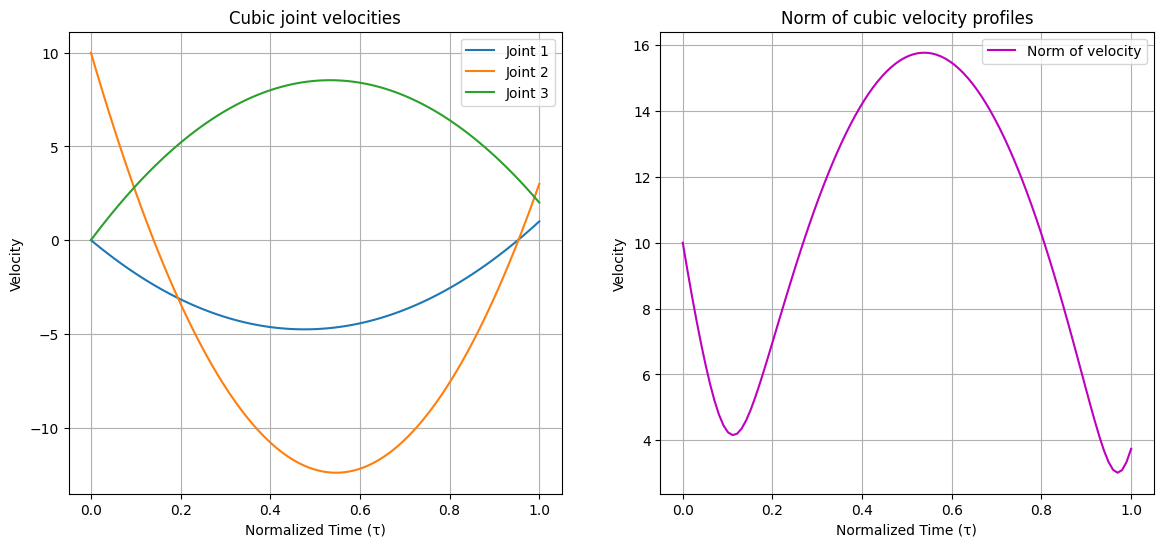

In [6]:
# (qin, qfin, vin, vfin, T)
JOINT_PARAMS = [
    (7, 4, 0, 1, 1),  
    (5, -1, 10, 3, 1),  
    (2, 8, 0, 1, 2),    
]

rbb.cubic_trajectories(JOINT_PARAMS, profile="velocity")

### determinant.py

In [7]:
theta1, theta2, l1, l2 = sp.symbols('theta1 theta2 l1 l2')

M = sp.Matrix([[l1 * sp.cos(theta1) + l2 * sp.cos(theta1 + theta2)],
               [l1 * sp.sin(theta1) + l2 * sp.sin(theta1 + theta2)],
               ])

J = rbb.compute_jacobian(M, variables=[theta1, theta2])

det_J = rbb.determinant(J)

==== Determinant of the matrix ====
l₁⋅l₂⋅sin(θ₂)


### DH_matrix.py

Displays the Denavit-Hartenberg transformation matrix

In [8]:
DH_mat = rbb.DH_matrix()
sp.pprint(DH_mat)

⎡cos(θ)  -sin(θ)⋅cos(α)  -sin(α)⋅sin(θ)  a⋅cos(θ)⎤
⎢                                                ⎥
⎢sin(θ)  cos(α)⋅cos(θ)   -sin(α)⋅cos(θ)  a⋅sin(θ)⎥
⎢                                                ⎥
⎢  0         sin(α)          cos(α)         d    ⎥
⎢                                                ⎥
⎣  0           0               0            1    ⎦


### DH_to_JL.py

In [9]:
q1, q2, a1, a2 = sp.symbols('q1 q2 a1 a2')

DHTABLE = [
    (0, a1, 0, q1),  # First link
    (0, a2, 0, q2)   # Second link
]

variables = [q1, q2]

JL = rbb.DH_to_JL(DHTABLE, variables)
sp.pprint(JL)

⎡-a₁⋅sin(q₁) - a₂⋅sin(q₁ + q₂)  -a₂⋅sin(q₁ + q₂)⎤
⎢                                               ⎥
⎢a₁⋅cos(q₁) + a₂⋅cos(q₁ + q₂)   a₂⋅cos(q₁ + q₂) ⎥
⎢                                               ⎥
⎣              0                       0        ⎦


### DH_to_JA.py

In [10]:
q1, q2, a1, a2 = sp.symbols('q1 q2 a1 a2')

DHTABLE = [
    (0, a1, 0, q1),  
    (0, a2, 0, q2)   
]

JA = rbb.DH_to_JA(DHTABLE)
sp.pprint(JA)

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣1  1⎦


### DK.py

In [11]:
# Example with the SCARA robot
a1, a2, d1, d4, q1, q2, q3, q4 = sp.symbols('a1 a2 d1 d4 q1 q2 q3 q4')

values = {
    a1: 1.0,  
    a2: 1.0,  
    d1: 0.5, 
    d4: 0.2,  
    q1: sp.pi/4,  
    q2: sp.pi/4,  
    q3: 0.5,
    q4: sp.pi/6,
}

DH_table = [
    [0, a1, d1, q1],        # Joint 1
    [0, a2, 0, q2],         # Joint 2
    [0, 0, q3, 0],          # Joint 3 (Prismatic)
    [sp.pi, 0, d4, q4]      # Joint 4
]

dirkin = rbb.DK(DH_table)

# 'Txy', 'position', 'x-axis', 'y-axis', 'z-axis'
sp.pprint(dirkin['position'])

⎡a₁⋅cos(q₁) + a₂⋅cos(q₁ + q₂)⎤
⎢                            ⎥
⎢a₁⋅sin(q₁) + a₂⋅sin(q₁ + q₂)⎥
⎢                            ⎥
⎣        d₁ + d₄ + q₃        ⎦


In [11]:
# Numerical substitution
sp.pprint(dirkin['position'].subs(values))

⎡   0.5⋅√2   ⎤
⎢            ⎥
⎢0.5⋅√2 + 1.0⎥
⎢            ⎥
⎣    1.2     ⎦


### euler_rotation.py

In [12]:
angles = [np.pi/2, np.pi/4, -np.pi/4]

R = rbb.euler_rotation(sequence='xyz', angles=angles)

print(R)

[[ 5.00000000e-01  5.00000000e-01  7.07106781e-01]
 [ 5.00000000e-01  5.00000000e-01 -7.07106781e-01]
 [-7.07106781e-01  7.07106781e-01  4.32978028e-17]]


### euler_rotation_inverse.py

In [14]:
angles = [np.pi/2, np.pi/4, -np.pi/4]

R = rbb.euler_rotation(sequence='xyz', angles=angles)

angles_inv = rbb.euler_rotation_inverse(sequence='xyz', R=R, solution_sign="pos")

print(angles_inv)
print(np.subtract(angles, angles_inv))

(1.5707963267948966, 0.7853981633974483, -0.7853981633974482)
[ 0.00000000e+00  0.00000000e+00 -1.11022302e-16]


### find_null.py

In [15]:
J = sp.Matrix([[-1, 0, 1],
               [0, 0, 0],
               ])

rbb.find_null(J)

Nullspace of the matrix:
Basis vector n°1:
⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦
Basis vector n°2:
⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦


### find_range.py

In [16]:
J = sp.Matrix([[-1, 0, 1],
               [0, 0, 0],
               ])

rbb.find_range(J)

Warning! This result might be wrong, please check by hand if possible.
Range of the Jacobian:
Basis vector n°1:
⎡-1⎤
⎢  ⎥
⎣0 ⎦


### gradient_IK_2R_planar.py

In [17]:
l = [0.5, 0.4]   # [m]
pd = [0.4, -0.3] # [m]

q0_1 = np.multiply([-70, -100], np.pi/180) # [rad]

q1, e1, q1_lst, e1_lst = rbb.gradient_IK_2R_planar(pd, q0_1, l, 
                                               kmax=66, alpha=1, verbose=0)

### jacobian_analysis.py

In [18]:
theta1, theta2, l1, l2 = sp.symbols('theta1 theta2 l1 l2')

# 2R Forward Kinematics
x = l1 * sp.cos(theta1) + l2 * sp.cos(theta1 + theta2)
y = l1 * sp.sin(theta1) + l2 * sp.sin(theta1 + theta2)

functions = [x, y]
variables = [theta1, theta2]

J = rbb.compute_jacobian(functions, variables)
rbb.jacobian_analysis(J, variables)

==== Jacobian Analysis ====
⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎦
Shape of the Jacobian is 2x2
The Jacobian is square
==== Determinant of the matrix ====
l₁⋅l₂⋅sin(θ₂)

==== Singularity conditions ====
[(θ₁, 0), (θ₁, π)]

==== Rank of the Jacobian ====
Rank: 2

==== Range of the Jacobian ====
Warning! This result might be wrong, please check by hand if possible.
Range of the Jacobian:
Basis vector n°1:
⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)⎤
⎢                             ⎥
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂) ⎦
Basis vector n°2:
⎡-l₂⋅sin(θ₁ + θ₂)⎤
⎢                ⎥
⎣l₂⋅cos(θ₁ + θ₂) ⎦

==== Nullspace of the Jacobian ====
Nullspace of the matrix:
The nullspace is trivial (only the zero vector).

==== Complementary nullspace of the Jacobian ====
The complementary nullspace is only the 0 vector

==== Dimension checking ====
dim Range(J) + dim Null(J^T): 2
..should equal the task-space dimensio

### newton_IK_2R_planar.py

In [19]:
l = [0.5, 0.4]   # [m]
pd = [0.4, -0.3] # [m]

# Elbow up solution
q0_1 = np.multiply([20, -120], np.pi/180) # [rad]

q1, e1, q1_lst, e1_lst = rbb.newton_IK_2R_planar(pd, q0_1, l, verbose=1)

===== Iteration n°1 =====
(q0, q1) = [ 0.1735905  -1.99607972]
Error norm: 0.07708794207802562
===== Iteration n°2 =====
(q0, q1) = [ 0.17969511 -1.98241324]
Error norm: 0.00720704119497683
===== Iteration n°3 =====
Converegence reached in 3 steps
Computed joint angles for target position [0.4, -0.3]: (q0, q1) = [ 0.17969511 -1.98241324]
Final error norm: 7.485780373751599e-05


In [20]:
# Elbow down solution
q0_2 = np.multiply([-70, 100], np.pi/180) # [rad]

q2, e2, q2_lst, e2_lst = rbb.newton_IK_2R_planar(pd, q0_2, l, kmax=4, verbose=1)

===== Iteration n°1 =====
(q0, q1) = [-1.45886458  2.01248161]
Error norm: 0.12123017840524487
===== Iteration n°2 =====
(q0, q1) = [-1.46715424  1.98264386]
Error norm: 0.013990331230679004
===== Iteration n°3 =====
(q0, q1) = [-1.46653475  1.98231337]
Error norm: 0.00028396842651794315
===== Iteration n°4 =====
Converegence reached in 4 steps
Computed joint angles for target position [0.4, -0.3]: (q0, q1) = [-1.46653475  1.98231337]
Final error norm: 9.055974332927428e-08


### plotter.py

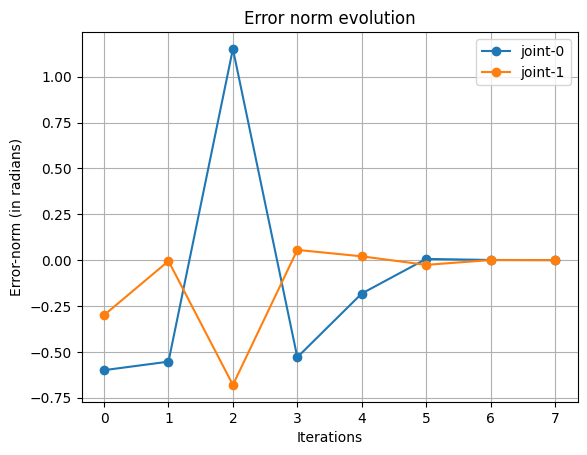

In [28]:
l = [0.5, 0.5] # [m]
pd = [0.4, -0.3] # [m]

q0 = np.multiply([0, 0], np.pi/180) # [rad]

q, e, q_lst, e_lst = rbb.newton_IK_2R_planar(pd, q0, l, kmax=10, verbose=0)

e_lst = np.array(e_lst) # The conversion is necessary to use slicing

X = range(len(e_lst))
rbb.plotter(X, [e_lst[:,0], e_lst[:,1]], "o",
        labels=["joint-0","joint-1"],
        title="Error norm evolution",
        xlabel="Iterations",
        ylabel="Error-norm (in radians)")

### quintic_poly_dnorm_coeffs.py

In [29]:
qin = 1
qfin = sp.pi  
vin = 0  
vfin = 1
ain = 0  
afin = 0  
T = 5 

q_tau, coeffs = rbb.quintic_poly_dnorm_coeffs(qin, qfin, vin, vfin, ain, afin, T, verbose=1)

==== Equations ====
Eq(f, 1) Eq(a + b + c + d + e + f, pi) Eq(e, 0) Eq(5*a + 4*b + 3*c + 2*d + e, 5) Eq(2*d, 0) Eq(20*a + 12*b + 6*c + 2*d, 0)
==== Symbolic solutions [a, b, c, d, e, f] ====
[-21 + 6*pi, 50 - 15*pi, -30 + 10*pi, 0, 0, 1]
==== Normalized trajectory ====
tau**5*(-21 + 6*pi) + tau**4*(50 - 15*pi) + tau**3*(-30 + 10*pi) + 1


### quintic_trajectories.py

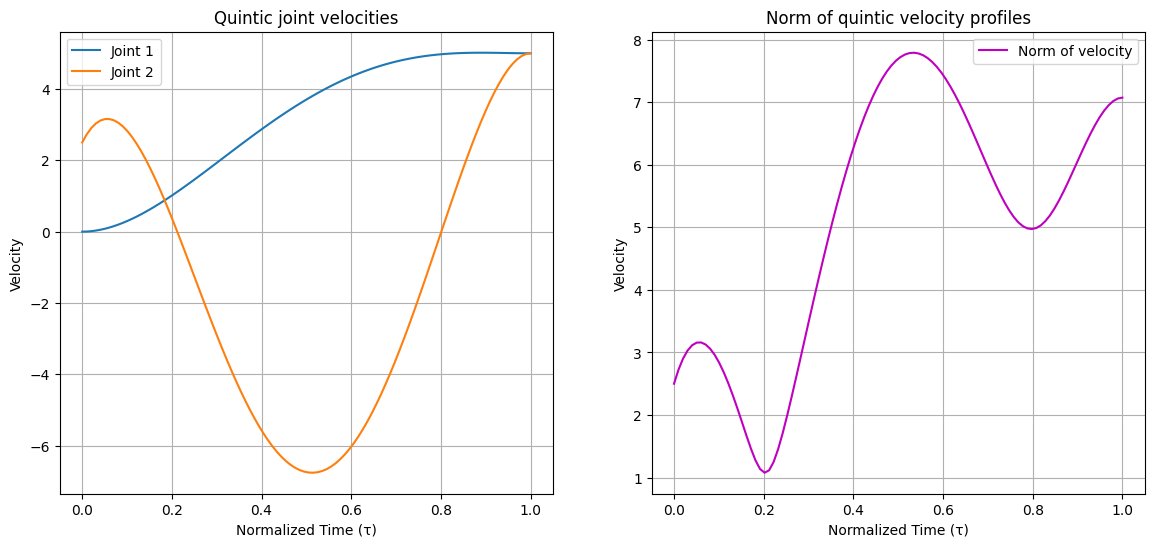

In [30]:
# (qin, qfin, vin, vfin, ain, afin, T)
joint_params = [
    (0, sp.pi, 0, 1, 0, 0, 5),  
    (3, sp.pi/2, 0.5, 1, 1, 0, 5)  
]

rbb.quintic_trajectories(joint_params, profile='velocity')

### rest_to_rest_motion.py

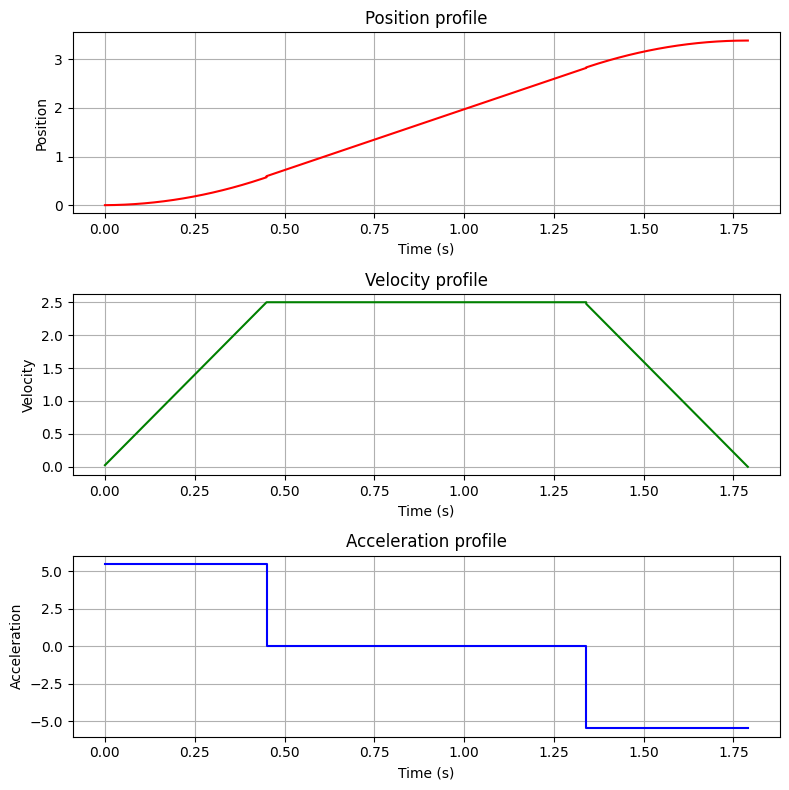

In [46]:
total_time = 1.79
acceleration_value = 5.5 
speed_value = 2.5 
acceleration_time = 0.45  

rbb.rest_to_rest_motion(total_time, acceleration_value, speed_value, acceleration_time)

### transformation_matrix.py

In [47]:
DH_table = [[0, 0.5, 1, sp.pi/4],
            [-sp.pi/2, 0.3, 0.2, sp.pi/6],
            [0, 0.2, 0.4, sp.pi/3],]

T = rbb.transformation_matrix(DH_table=DH_table, x=1, y=2)
sp.pprint(T)

⎡ √3                          ⎤
⎢ ──   -3/4  1/2  0.2 + 0.2⋅√3⎥
⎢ 4                           ⎥
⎢                             ⎥
⎢      -√3   √3               ⎥
⎢1/4   ────  ──   0.2 + 0.2⋅√3⎥
⎢       4    2                ⎥
⎢                             ⎥
⎢-√3                          ⎥
⎢────  -1/2   0   0.2 - 0.1⋅√3⎥
⎢ 2                           ⎥
⎢                             ⎥
⎣ 0     0     0        1      ⎦


The numerical result can be obtained with evalf()

In [48]:
T_num = T.evalf()
sp.pprint(T_num)

⎡0.433012701892219         -0.75                0.5         0.546410161513776 ⎤
⎢                                                                             ⎥
⎢       0.25         -0.433012701892219  0.866025403784439  0.546410161513776 ⎥
⎢                                                                             ⎥
⎢-0.866025403784439         -0.5                 0          0.0267949192431123⎥
⎢                                                                             ⎥
⎣        0                   0                   0                 1.0        ⎦
